$\#\#\#\#\#\#\#$ Llibreries $\#\#\#\#\#\#\#$

In [14]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
import re
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

import warnings

warnings.filterwarnings('ignore') 

$\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#$

### Data:

%https://sports-statistics.com/sports-data/sports-data-sets-for-data-modeling-visualization-predictions-machine-learning/

%NFL game data: https://github.com/ryurko/nflscrapR-data/tree/master/games_data/regular_season

%NFL play by play data: http://nflsavant.com/about.php

%NBA play by play data: https://sports-statistics.com/sports-data/nba-basketball-datasets-csv-files/

%NBL dataset (this one for Lisa Simpson!) https://sports-statistics.com/sports-data/mlb-historical-odds-scores-datasets/





The dataset choosen is the UFC fight statistics. From the webpage [1]. In this dataset we have the IDs of the rounds, fighters. The significant strikes that the fighter on a round had landed and attempted, on which part of the body (head, body, legs), and in which position was the fighter when he stroke (ground, clinch, distance).


[1] https://vegas-odds.com/sports-data/ufc-fight-statistics-datasets/


In [15]:
dfa = pd.read_csv('ufc-strikes-by-round-data.csv')

%dfb = pd.read_csv('ufc-fight-metadata.csv')

In [16]:
dfa.shape

(209912, 29)

In [17]:
dfa.head()

,ROUNDINFO_ID,FIGHT_ID,FIGHT_ROUND,FIGHTER_ID,KD,SIG_STR_MADE,SIG_STR_ATTEMPTED,SIG_STR_PERCENT,TOTAL_STR_MADE,TOTAL_STR_ATTEMPTED,...,BODY_MADE,LEG_ATTEMPTED,LEG_MADE,DISTANCE_ATTEMPTED,DISTANCE_MADE,CLINCH_ATTEMPTED,CLINCH_MADE,GROUND_ATTEMPTED,GROUND_MADE,EXTRA_INFO
0,9532,1,5130,1,14,28,50,14,28,0,...,1,1,24,11,4,3,0,0,NaN,NaN
1,9532,1,5131,0,10,19,52,10,19,0,...,4,3,15,8,4,2,0,0,NaN,NaN
2,9533,1,5132,0,10,16,62,28,36,0,...,0,0,13,8,1,1,2,1,NaN,NaN
3,9533,1,5133,0,44,72,61,64,111,3,...,2,1,7,2,1,1,64,41,NaN,NaN
4,9533,2,5132,0,7,11,63,12,16,0,...,0,0,11,7,0,0,0,0,NaN,NaN


In [18]:
dfa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209912 entries, 0 to 209911
Data columns (total 29 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ROUNDINFO_ID         209912 non-null  object
 1   FIGHT_ID             209912 non-null  object
 2   FIGHT_ROUND          209912 non-null  object
 3   FIGHTER_ID           209912 non-null  object
 4   KD                   209912 non-null  object
 5   SIG_STR_MADE         209912 non-null  object
 6   SIG_STR_ATTEMPTED    209912 non-null  object
 7   SIG_STR_PERCENT      209912 non-null  object
 8   TOTAL_STR_MADE       209912 non-null  object
 9   TOTAL_STR_ATTEMPTED  209912 non-null  object
 10  TD_MADE              209912 non-null  object
 11  TD_ATTEMPTED         209912 non-null  object
 12  TD_PERCENT           209912 non-null  object
 13  SUB_ATT              6 non-null       object
 14  PASS                 209912 non-null  object
 15  REV                  209912 non-nu

In [19]:
dfa[dfa.SUB_ATT.notnull()]

,ROUNDINFO_ID,FIGHT_ID,FIGHT_ROUND,FIGHTER_ID,KD,SIG_STR_MADE,SIG_STR_ATTEMPTED,SIG_STR_PERCENT,TOTAL_STR_MADE,TOTAL_STR_ATTEMPTED,...,BODY_MADE,LEG_ATTEMPTED,LEG_MADE,DISTANCE_ATTEMPTED,DISTANCE_MADE,CLINCH_ATTEMPTED,CLINCH_MADE,GROUND_ATTEMPTED,GROUND_MADE,EXTRA_INFO
29810,ROUNDINFO_ID,FIGHT_ID,FIGHT_ROUND,FIGHTER_ID,KD,SIG_STR_MADE,SIG_STR_ATTEMPTED,SIG_STR_PERCENT,TOTAL_STR_MADE,TOTAL_STR_ATTEMPTED,...,BODY_MADE,LEG_ATTEMPTED,LEG_MADE,DISTANCE_ATTEMPTED,DISTANCE_MADE,CLINCH_ATTEMPTED,CLINCH_MADE,GROUND_ATTEMPTED,GROUND_MADE,EXTRA_INFO
59677,ROUNDINFO_ID,FIGHT_ID,FIGHT_ROUND,FIGHTER_ID,KD,SIG_STR_MADE,SIG_STR_ATTEMPTED,SIG_STR_PERCENT,TOTAL_STR_MADE,TOTAL_STR_ATTEMPTED,...,BODY_MADE,LEG_ATTEMPTED,LEG_MADE,DISTANCE_ATTEMPTED,DISTANCE_MADE,CLINCH_ATTEMPTED,CLINCH_MADE,GROUND_ATTEMPTED,GROUND_MADE,EXTRA_INFO
89598,ROUNDINFO_ID,FIGHT_ID,FIGHT_ROUND,FIGHTER_ID,KD,SIG_STR_MADE,SIG_STR_ATTEMPTED,SIG_STR_PERCENT,TOTAL_STR_MADE,TOTAL_STR_ATTEMPTED,...,BODY_MADE,LEG_ATTEMPTED,LEG_MADE,DISTANCE_ATTEMPTED,DISTANCE_MADE,CLINCH_ATTEMPTED,CLINCH_MADE,GROUND_ATTEMPTED,GROUND_MADE,EXTRA_INFO
119581,ROUNDINFO_ID,FIGHT_ID,FIGHT_ROUND,FIGHTER_ID,KD,SIG_STR_MADE,SIG_STR_ATTEMPTED,SIG_STR_PERCENT,TOTAL_STR_MADE,TOTAL_STR_ATTEMPTED,...,BODY_MADE,LEG_ATTEMPTED,LEG_MADE,DISTANCE_ATTEMPTED,DISTANCE_MADE,CLINCH_ATTEMPTED,CLINCH_MADE,GROUND_ATTEMPTED,GROUND_MADE,EXTRA_INFO
149640,ROUNDINFO_ID,FIGHT_ID,FIGHT_ROUND,FIGHTER_ID,KD,SIG_STR_MADE,SIG_STR_ATTEMPTED,SIG_STR_PERCENT,TOTAL_STR_MADE,TOTAL_STR_ATTEMPTED,...,BODY_MADE,LEG_ATTEMPTED,LEG_MADE,DISTANCE_ATTEMPTED,DISTANCE_MADE,CLINCH_ATTEMPTED,CLINCH_MADE,GROUND_ATTEMPTED,GROUND_MADE,EXTRA_INFO
179751,ROUNDINFO_ID,FIGHT_ID,FIGHT_ROUND,FIGHTER_ID,KD,SIG_STR_MADE,SIG_STR_ATTEMPTED,SIG_STR_PERCENT,TOTAL_STR_MADE,TOTAL_STR_ATTEMPTED,...,BODY_MADE,LEG_ATTEMPTED,LEG_MADE,DISTANCE_ATTEMPTED,DISTANCE_MADE,CLINCH_ATTEMPTED,CLINCH_MADE,GROUND_ATTEMPTED,GROUND_MADE,EXTRA_INFO


This dataset is appended, i.e., every time we have the column line the fights have been copy/paste and added the new ones, so the rows we want to take into account are the ones from row 179751.

In [20]:
dfa = dfa.iloc[179752:,:]

%# in columns 6, 27, 28 all values are null. Investigating we see that are column title, the 
%# dataset was concatenated without earsing the column names before uploading it.
%ind = dfa[dfa.SUB_ATT.notnull()].index.tolist()
%dfa.drop(ind, axis = 0, inplace=True)

In [21]:
# the columns 6, 27 and 28 are useless, we see that in the stats no submission attempt was made, and no one won
# won the round by using ground techniques. Also, there is no extra info for each attack.
dfa.drop(['SUB_ATT', 'GROUND_MADE', 'EXTRA_INFO'], axis=1, inplace=True)
dfa.head()

,ROUNDINFO_ID,FIGHT_ID,FIGHT_ROUND,FIGHTER_ID,KD,SIG_STR_MADE,SIG_STR_ATTEMPTED,SIG_STR_PERCENT,TOTAL_STR_MADE,TOTAL_STR_ATTEMPTED,...,HEAD_MADE,BODY_ATTEMPTED,BODY_MADE,LEG_ATTEMPTED,LEG_MADE,DISTANCE_ATTEMPTED,DISTANCE_MADE,CLINCH_ATTEMPTED,CLINCH_MADE,GROUND_ATTEMPTED
179752,9532,1,5130,1,14,28,50,14,28,0,...,1,1,1,1,24,11,4,3,0,0
179753,9532,1,5131,0,10,19,52,10,19,0,...,1,1,4,3,15,8,4,2,0,0
179754,9533,1,5132,0,10,16,62,28,36,0,...,2,2,0,0,13,8,1,1,2,1
179755,9533,1,5133,0,44,72,61,64,111,3,...,1,1,2,1,7,2,1,1,64,41
179756,9533,2,5132,0,7,11,63,12,16,0,...,2,2,0,0,11,7,0,0,0,0


In [22]:
dfa = dfa.reset_index(drop=True)

Since all of them are integers we convert the data set to integers, we know they are integers because the values are IDs, number of strikes totals, or number of strikes on body, and so on.

In [23]:
dfa = dfa.replace('---', '0')

In [24]:
dfa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30160 entries, 0 to 30159
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ROUNDINFO_ID         30160 non-null  object
 1   FIGHT_ID             30160 non-null  object
 2   FIGHT_ROUND          30160 non-null  object
 3   FIGHTER_ID           30160 non-null  object
 4   KD                   30160 non-null  object
 5   SIG_STR_MADE         30160 non-null  object
 6   SIG_STR_ATTEMPTED    30160 non-null  object
 7   SIG_STR_PERCENT      30160 non-null  object
 8   TOTAL_STR_MADE       30160 non-null  object
 9   TOTAL_STR_ATTEMPTED  30160 non-null  object
 10  TD_MADE              30160 non-null  object
 11  TD_ATTEMPTED         30160 non-null  object
 12  TD_PERCENT           30160 non-null  object
 13  PASS                 30160 non-null  object
 14  REV                  30160 non-null  object
 15  HEAD_ATTEMPTED       30160 non-null  object
 16  HEAD

In [25]:
dfa= dfa.apply(pd.to_numeric)

In [26]:
# we set the name of the columns in lowercase.
dfa.columns= dfa.columns.str.lower()

In [27]:
dfa.describe()

,roundinfo_id,fight_id,fight_round,fighter_id,kd,sig_str_made,sig_str_attempted,sig_str_percent,total_str_made,total_str_attempted,...,head_made,body_attempted,body_made,leg_attempted,leg_made,distance_attempted,distance_made,clinch_attempted,clinch_made,ground_attempted
count,30160.000000,30160.000000,30160.000000,30160.000000,30160.000000,30160.000000,30160.000000,30160.000000,30160.000000,30160.000000,...,30160.000000,30160.000000,30160.000000,30160.000000,30160.000000,30160.000000,30160.000000,30160.000000,30160.000000,30160.000000
mean,12647.537997,1.883886,5978.546286,0.092109,14.861174,33.964058,44.186174,22.622878,42.739357,0.457361,...,4.393966,3.022347,3.023806,2.420623,27.580736,10.493634,3.192905,2.193999,3.190418,2.173541
std,1834.699745,0.923970,559.973472,0.320716,11.502131,24.147620,18.677257,16.369827,25.924788,0.791571,...,4.554844,3.420723,3.847136,3.168071,23.788723,10.306090,4.896311,3.605473,7.000314,4.855031
min,9532.000000,1.000000,5130.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,11057.750000,1.000000,5519.750000,0.000000,6.000000,16.000000,33.000000,11.000000,24.000000,0.000000,...,1.000000,1.000000,0.000000,0.000000,9.000000,3.000000,0.000000,0.000000,0.000000,0.000000
50%,12607.000000,2.000000,5903.000000,0.000000,13.000000,29.000000,43.000000,20.000000,40.000000,0.000000,...,3.000000,2.000000,2.000000,1.000000,22.000000,8.000000,1.000000,1.000000,0.000000,0.000000
75%,14214.000000,3.000000,6398.000000,0.000000,21.000000,48.000000,55.000000,30.000000,58.000000,1.000000,...,6.000000,4.000000,4.000000,4.000000,41.000000,15.000000,4.000000,3.000000,3.000000,2.000000
max,16018.000000,5.000000,7359.000000,4.000000,141.000000,220.000000,100.000000,344.000000,351.000000,9.000000,...,52.000000,49.000000,42.000000,34.000000,218.000000,139.000000,61.000000,45.000000,104.000000,92.000000


fighter_id is the column of the name of the winner of the fight, but sometimes the opponent wins/tie the round, hence we have values as 1 or so. In the dataset the winner fighters are marked with 0, while the underdogs are marked as 1, 2, 3, and 4. Since we only care if they have won or not the fight, we will mark all the underdogs as 1.

In [28]:
dfa.fighter_id.value_counts()

0    27639
1     2294
2      200
3       24
4        3
Name: fighter_id, dtype: int64

In [29]:
# let's change the values on fighter_id underdogs:
dfa[dfa.fighter_id == 2] = 1
dfa[dfa.fighter_id == 3] = 1
dfa[dfa.fighter_id == 4] = 1

In [30]:
dfa.fighter_id.value_counts()

0    27639
1     2521
Name: fighter_id, dtype: int64

In [31]:
# save cleaned dataset:
#dfa.to_csv('ufc-strikes-by-round-data_CLEAN.csv')

# Nivell 1

## Exercici 1: Agafa un conjunt de dades de tema esportiu que t'agradi. Realitza un mostreig de les dades generant una mostra aleatòria simple i una mostra sistemàtica.



The exercise asks for do sample by using two different methods: Simple Random Sample and Systematic Sample.

**Simple Random Sample:** It is the Montecarlo method, where roll X random values, that matches the range of the number of population, and then pick the samples that matches these values.

$$\mbox{sample} = \mbox{list_population}(  \mbox{random value from random function} )$$

**Systematic Sample:** Select the sample using a ranodom value (like a MonteCarlo), then decide the size of the sample (how many samples you want to take from the population), finally divide the population of the sample by the size of the sample to get which sample of the population we take (if N/n = i then we take every ith value).

$$\mbox{index_sample}=\frac{population(N)}{size of the sample (n)}\mbox{, we take every index_sample-nth.}$$


In [32]:
dfa.shape

(30160, 26)

In [33]:
# Simple Random Sample, we will take a 30% of the population for the sampling (typical).
n = round(dfa.shape[0]*0.3) # 30% of the population.

# Now we roll N random values that will be our indexes, to handpick the sample.
indx =  np.random.randint(0, (len(dfa)),n)
dfSRS = dfa.iloc[indx,:]

In [34]:
dfSRS.shape

(9048, 26)

In [35]:
dfSRS

,roundinfo_id,fight_id,fight_round,fighter_id,kd,sig_str_made,sig_str_attempted,sig_str_percent,total_str_made,total_str_attempted,...,head_made,body_attempted,body_made,leg_attempted,leg_made,distance_attempted,distance_made,clinch_attempted,clinch_made,ground_attempted
3002,10138,3,5623,0,29,92,31,29,92,0,...,17,6,12,11,92,29,0,0,0,0
10153,11597,1,5341,0,15,24,62,29,38,1,...,3,2,2,1,17,10,1,0,6,5
14299,12447,1,5596,0,10,20,50,13,23,0,...,3,2,0,0,15,6,3,2,2,2
8109,11178,1,5809,0,9,33,27,9,33,0,...,4,2,2,2,31,8,2,1,0,0
12170,12010,3,6092,0,17,63,26,17,63,0,...,10,3,4,4,59,14,4,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19414,13525,1,6580,0,10,25,40,17,34,2,...,3,2,4,2,22,8,1,0,2,2
10615,11693,3,6028,0,9,36,25,9,36,1,...,4,2,0,0,36,9,0,0,0,0
13029,12184,2,6098,0,11,23,47,24,38,0,...,0,0,0,0,9,2,1,1,13,8
27597,15320,3,6969,0,2,4,50,2,4,0,...,1,0,2,2,4,2,0,0,0,0


In [36]:
# another way to do the same is by using the function df.sample:
dfSRS_2 = dfa.sample(frac=0.1, random_state=42) 
# the random state choosen is for the reproducibility, and of course we choose the number that is the answer of the
# universe.
dfSRS_2.shape

(3016, 26)

In [37]:
dfSRS_2

,roundinfo_id,fight_id,fight_round,fighter_id,kd,sig_str_made,sig_str_attempted,sig_str_percent,total_str_made,total_str_attempted,...,head_made,body_attempted,body_made,leg_attempted,leg_made,distance_attempted,distance_made,clinch_attempted,clinch_made,ground_attempted
217,9578,2,5223,0,17,40,42,17,40,3,...,10,9,3,3,39,17,1,0,0,0
27071,15197,1,6858,0,3,9,33,8,15,1,...,0,0,0,0,3,2,6,1,0,0
21613,13988,2,6342,0,22,76,28,23,77,0,...,5,3,4,3,73,20,3,2,0,0
12484,12072,1,5596,0,4,13,30,19,30,2,...,3,1,2,2,10,2,3,2,0,0
8890,11337,3,5158,0,18,40,45,29,51,1,...,7,4,6,4,36,14,3,3,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6126,10765,2,5852,0,1,1,100,5,6,0,...,1,1,0,0,1,1,0,0,0,0
8807,11320,3,5638,0,16,41,39,32,60,0,...,12,10,1,0,34,11,7,5,0,0
12968,12171,2,6263,0,18,61,29,20,64,0,...,6,3,5,5,59,18,2,0,0,0
24776,14666,3,6557,0,23,39,58,65,83,2,...,5,3,1,1,29,16,3,0,7,7


In [38]:
# Systematic Sampling: 
#from the first 10 rows (indexes= 0-9) we choose one value randomnly:
ind = np.random.randint(0,9)
ind


1

In [39]:
# now we want to first the 5th row, and then every h, we will take the rest of the values.
# take into account that we have chose a sample that it is the 10% of our set, thus, the h will pick a value every 
# 10. Having chose another value i.e., 25% h will be each 25th value.
N = dfa.shape[0]
n = round(dfa.shape[0]*0.3)

h = round(N/n)

df_SS = dfa.loc[ind::h,:]
df_SS.head()

,roundinfo_id,fight_id,fight_round,fighter_id,kd,sig_str_made,sig_str_attempted,sig_str_percent,total_str_made,total_str_attempted,...,head_made,body_attempted,body_made,leg_attempted,leg_made,distance_attempted,distance_made,clinch_attempted,clinch_made,ground_attempted
1,9532,1,5131,0,10,19,52,10,19,0,...,1,1,4,3,15,8,4,2,0,0
4,9533,2,5132,0,7,11,63,12,16,0,...,2,2,0,0,11,7,0,0,0,0
7,9533,3,5133,0,4,7,57,65,96,2,...,0,0,0,0,0,0,0,0,7,4
10,9534,2,5134,0,11,28,39,24,42,0,...,4,2,3,3,27,10,1,1,0,0
13,9534,3,5135,0,17,39,43,29,53,1,...,10,5,4,3,35,15,4,2,0,0


In [40]:
df_SS.shape

(10053, 26)

# Nivell 2

## Exercici 2: Continua amb el conjunt de dades de tema esportiu i genera una mostra estratificada i una mostra utilitzant SMOTE (Synthetic Minority Oversampling Technique).

SMOTE is used for imbalanced datasets. I.e., when the classification labels are not equally represented and one class oversizes the other. SMOTES creates synthetic data to over-sample the minority class instead of doing it by replacement.

From [1]:

"The minority class is over-sampled by taking each minority class sample and introducing synthetic examples along the line segments joining any/all of the $k$ minority class nearest neighbors. Depending upon the amount of over-sampling required, neighbors from the $k$ nearest neighbors are randomly chosen."


[1] https://arxiv.org/pdf/1106.1813.pdf

In [41]:
dfa.columns

Index(['roundinfo_id', 'fight_id', 'fight_round', 'fighter_id', 'kd',
       'sig_str_made', 'sig_str_attempted', 'sig_str_percent',
       'total_str_made', 'total_str_attempted', 'td_made', 'td_attempted',
       'td_percent', 'pass', 'rev', 'head_attempted', 'head_made',
       'body_attempted', 'body_made', 'leg_attempted', 'leg_made',
       'distance_attempted', 'distance_made', 'clinch_attempted',
       'clinch_made', 'ground_attempted'],
      dtype='object')

We drop the columns: roundinfo_id and fight_round. These two columns only provide information on the event. roundinfo_id is the number of the fight given by the UFC (it is tied to the event), fight_round is the accumulated number of rounds a fighter had fight.

We will keep fight_id, hence this column gives is the index of the round number. For each round we have the row for one and the other fighter. 

We are going to use fighter_id as classifier, that is the fighter that has won/tie the round, 0 for the favorite, 1 for the underdog.

In [42]:
dfa = dfa.drop(['roundinfo_id', 'fight_round'], axis =1)

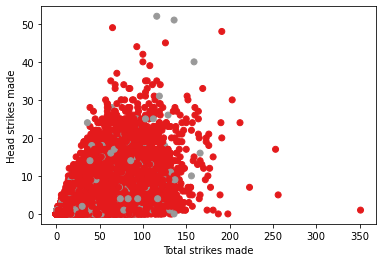

In [43]:
X0 = dfa.total_str_made
X1 = dfa.head_made
X2 = dfa.fighter_id
plt.scatter(X0, X1, c=X2, marker='o', facecolors='none', cmap=plt.cm.Set1)
plt.xlabel('Total strikes made')
plt.ylabel('Head strikes made')
plt.show()

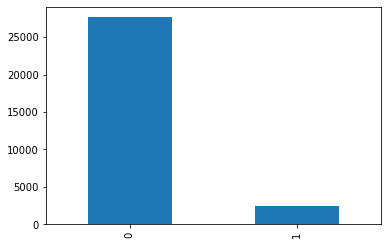

In [44]:
dfa.fighter_id.value_counts().plot.bar()
plt.show()

In [45]:
df = dfa.copy()

In [46]:
# Make a classificator:
X = np.array(dfa.loc[:, dfa.columns != 'fighter_id'])
y = np.array(dfa.loc[:, dfa.columns == 'fighter_id']).reshape(-1,1)

In [47]:
# We need to standarize X, values are integers.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [48]:
#Now we need to split our data set, we will be using sklearn library.
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y, test_size=0.3, 
                                                    random_state=42, shuffle=True)

In [49]:
sm = SMOTE(random_state=42)

In [50]:
X_train_new, y_train_new = sm.fit_resample(X_train, y_train.ravel())

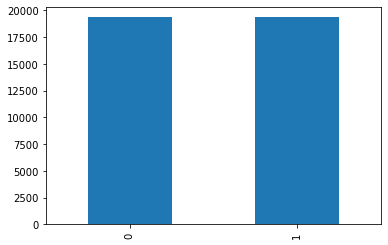

In [53]:
pd.Series(y_train_new).value_counts().plot.bar()
plt.show()

Now, we have a sample of the dataset that will allow us to finer results if we want to determine on a fight which fighter has won each round.

# Nivell 3

## Exercici 3: Continua amb el conjunt de dades de tema esportiu i genera una mostra utilitzant el mètode Reservoir sampling.

A reservoir sampling it is done over datasets that have a large number of items, N unknown items, and we want to select a n subset of items without replacement. 

To do so, we make a reservoir with the first n items from a list of N, that we want to take the sample. We randomly  choose which item of the reservoir we want to change, then we use Poisson distribution to determine where it is the item of the list of N ("time-step") and we switch for the one in the reservoir.

In the reservoir sampling from the notes in theory [1], they use a a random value to determine if the value on n will be replace with the item in N. Because of this they need to roll k random values to find if the value to be replaced. In our case, since we use Poisson distribution we don't need to roll k values, the Poisson distribution will move us up to the value that will be changed, hence all the values will have equal probability to be switched.


[1] https://towardsdatascience.com/the-5-sampling-algorithms-every-data-scientist-need-to-know-43c7bc11d17c

In [54]:
# Reservoir sampling with replacing: we will put the first n values in a reservoir, and then we will replace them 
# with values that fullfil a requirement.

def reservoir_sampling(items, n):
    # make a reservoir with the n first values of the items:
    reservoir = list(range(n))

    i = n-1
    r = n-1
    while i < len(items):
        # switch item i from reservoir with item r from the dataset.
        reservoir[r] = items[i]
    
        # select a new value of the reservoir by using an uniform:
        r = np.random.randint(0,n-1)
        # choose for with a Poisson the number to pick from N:
        p = np.ceil(-n*np.log(np.random.uniform(0,1))).astype(int)
        i = i + p
    
    return reservoir

# items on the data set:
items = list(range(0,dfa.shape[0]))
#reservoir size:
n = 100 #round(dfa.shape[0]*0.01)

indx = reservoir_sampling(items, n)
sample = dfa.iloc[indx]


In [55]:
sample.shape

(100, 24)

CDF graph to make sure that the indexes are well behaved:

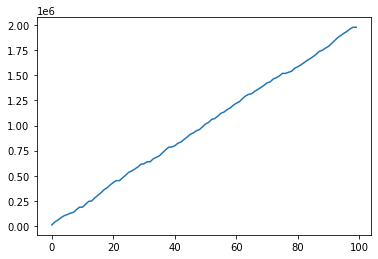

In [56]:
x = range(0,len(indx))
cdf = np.cumsum(indx)
plt.plot(x,cdf)
plt.show()

CDF distribution of the indexes shows that the indexes choosen follow normal distribution, thus they are well mapped. 